In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [68]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Q2

In [69]:
df = pd.read_csv("Gs.txt", names=["G"], header=None, )
df

,G
0,5.10000
1,-3.90000
2,4.10000
3,15.10000
4,5.10000
...,...
149995,18.10000
149996,6.10000
149997,6.10000
149998,4.10000


In [70]:
df['run_number'] = df.reset_index().index + 1

In [71]:
df["G_sum_cumulative"] = df.cumsum()["G"]

In [72]:
df['J_estimate'] = df.G_sum_cumulative/df.run_number

In [73]:
df

,G,run_number,G_sum_cumulative,J_estimate
0,5.10000,1,5.10000,5.10000
1,-3.90000,2,1.20000,0.60000
2,4.10000,3,5.30000,1.76667
3,15.10000,4,20.40000,5.10000
4,5.10000,5,25.50000,5.10000
...,...,...,...,...
149995,18.10000,149996,1145925.10000,7.63970
149996,6.10000,149997,1145931.20000,7.63969
149997,6.10000,149998,1145937.30000,7.63968
149998,4.10000,149999,1145941.40000,7.63966


## Q2a

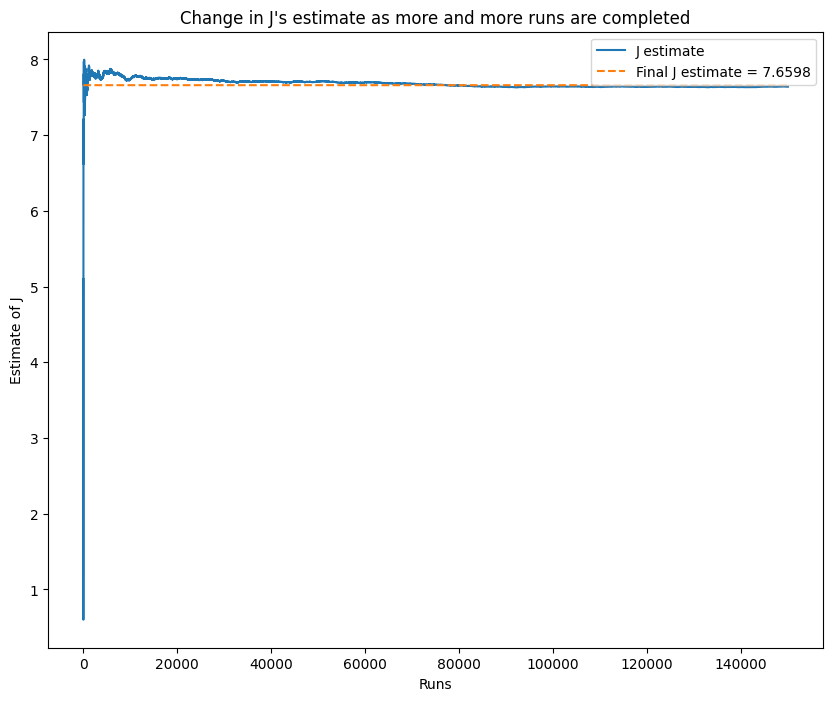

In [91]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 8)
sns.lineplot(df, x="run_number", y="J_estimate", label = "J estimate")
sns.lineplot(df, x="run_number", y=7.659743999995969, label = "Final J estimate = 7.6598", linestyle="--")

# ax.set_xscale('log')

ax.set_xlabel("Runs")
ax.set_ylabel("Estimate of J")
ax.set_title("Change in J's estimate as more and more runs are completed")
plt.show()

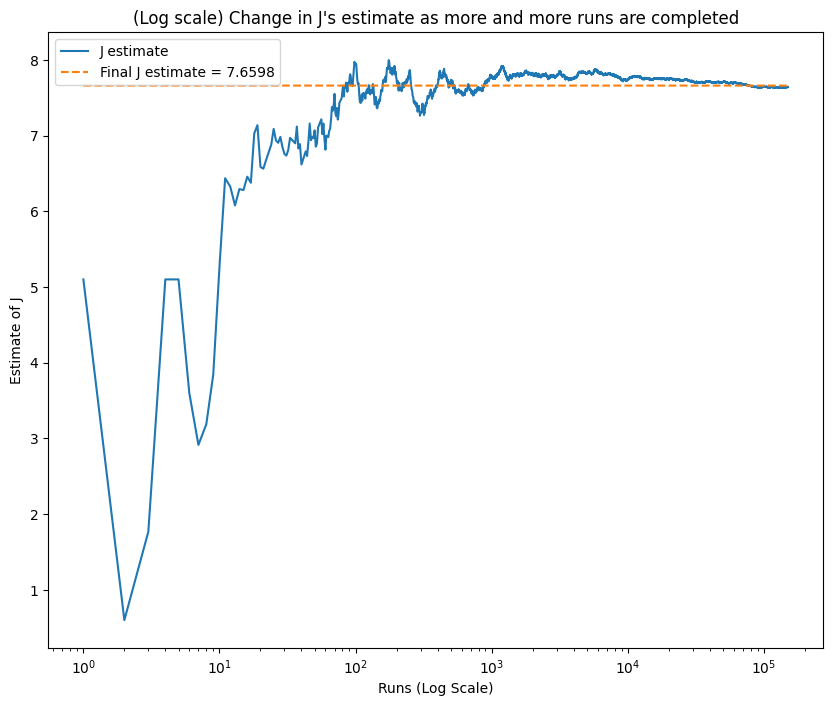

In [93]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 8)
sns.lineplot(df, x="run_number", y="J_estimate", label = "J estimate")
sns.lineplot(df, x="run_number", y=7.659743999995969, label = "Final J estimate = 7.6598", linestyle="--")

ax.set_xscale('log')

ax.set_xlabel("Runs (Log Scale)")
ax.set_ylabel("Estimate of J")
ax.set_title("(Log scale) Change in J's estimate as more and more runs are completed")
plt.show()

In [76]:
df.J_estimate[149999]

7.639649999995602

In [77]:
df["J_final"] = df.J_estimate[149999]

In [78]:
df["J_final - G"] = df["J_final"] - df["G"]

In [79]:
df["(J_final - G)^2)"] = df["J_final - G"] * df["J_final - G"]

In [80]:
df["(J_final - G)^2)"].sum()/len(df)

45.38499287750001

## Q2 b
### Variance = 45.38499287750001

In [81]:
df

,G,run_number,G_sum_cumulative,J_estimate,J_final,J_final - G,(J_final - G)^2)
0,5.10000,1,5.10000,5.10000,7.63965,2.53965,6.44982
1,-3.90000,2,1.20000,0.60000,7.63965,11.53965,133.16352
2,4.10000,3,5.30000,1.76667,7.63965,3.53965,12.52912
3,15.10000,4,20.40000,5.10000,7.63965,-7.46035,55.65682
4,5.10000,5,25.50000,5.10000,7.63965,2.53965,6.44982
...,...,...,...,...,...,...,...
149995,18.10000,149996,1145925.10000,7.63970,7.63965,-10.46035,109.41892
149996,6.10000,149997,1145931.20000,7.63969,7.63965,1.53965,2.37052
149997,6.10000,149998,1145937.30000,7.63968,7.63965,1.53965,2.37052
149998,4.10000,149999,1145941.40000,7.63966,7.63965,3.53965,12.52912


## Q 2C

In [82]:
gamma = np.array([1, 0.99, 0.9, 0.75, 0.5, 0.25, 0])
J = 5.22 + 2.709*gamma
for g in gamma:
    print(f"{g} \t  {5.22 + 2.709*g}")

1.0 	  7.929
0.99 	  7.90191
0.9 	  7.658099999999999
0.75 	  7.2517499999999995
0.5 	  6.5745
0.25 	  5.89725
0.0 	  5.22


In [83]:
# 1 : 7.921926666666667
# 0.99: 7.902285533336392
# 0.75: 7.255098333333334
# 0.5: 6.590343333333333
# 0.25: 5.904346666666667
# 0: 5.23526

# Q2 d

Random Policy stats


In [84]:
df_2 = pd.read_csv("Q2_stats.txt", sep=" ")
df_2

,N,J_estimate
0,1,11.25200
1,2,4.61700
2,3,4.60900
3,4,15.03000
4,5,13.86100
...,...,...
245,246,16.04500
246,247,16.02600
247,248,16.24600
248,249,15.74800


In [85]:
df_2.N

0        1
1        2
2        3
3        4
4        5
      ... 
245    246
246    247
247    248
248    249
249    250
Name: N, Length: 250, dtype: int64

In [86]:
rolling_window = 10
df_2['J_estimate_smoothed'] = df_2['J_estimate'].rolling(rolling_window).mean()

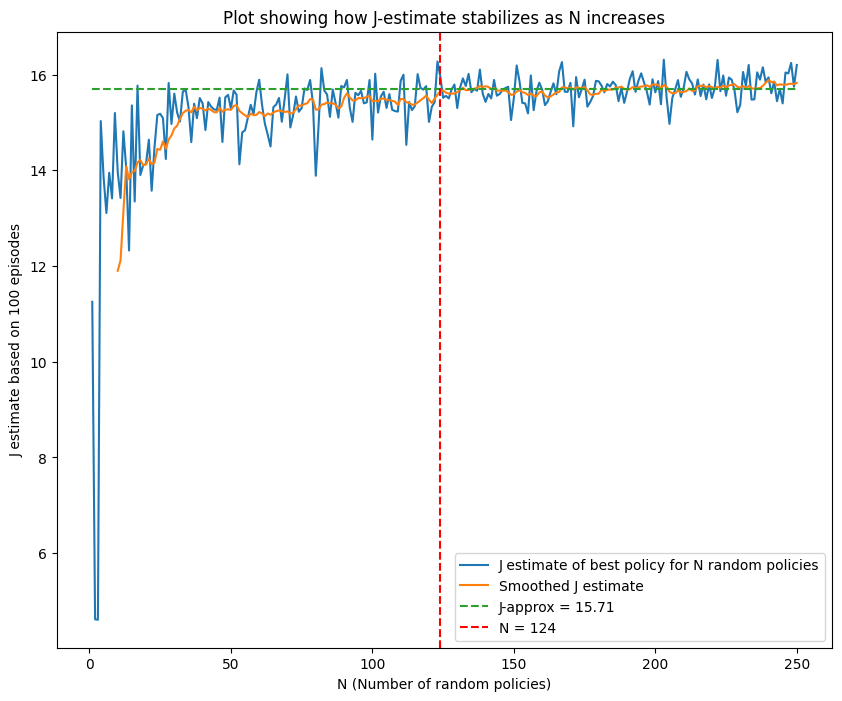

In [87]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 8)
sns.lineplot(df_2, x="N", y="J_estimate", label = "J estimate of best policy for N random policies")

# Plot the smoothed data
sns.lineplot(data=df_2, x="N", y="J_estimate_smoothed", label="Smoothed J estimate", linestyle="-")

sns.lineplot(df_2, x="N", y=15.71, label = "J-approx = 15.71", linestyle="--")

vertical_line_x = 124
ax.axvline(x=vertical_line_x, color='red', linestyle='--', label='N = 124')


# ax.set_xscale('log')

ax.set_xlabel("N (Number of random policies)")
ax.set_ylabel("J estimate based on 100 episodes")
ax.set_title("Plot showing how J-estimate stabilizes as N increases")
ax.legend()
plt.show()

In [88]:
df_2[df_2.N>123].J_estimate.mean()

15.712779527559032

In [89]:
df_3 = df_2[df_2.N.apply(lambda x: x%10 == 1)]

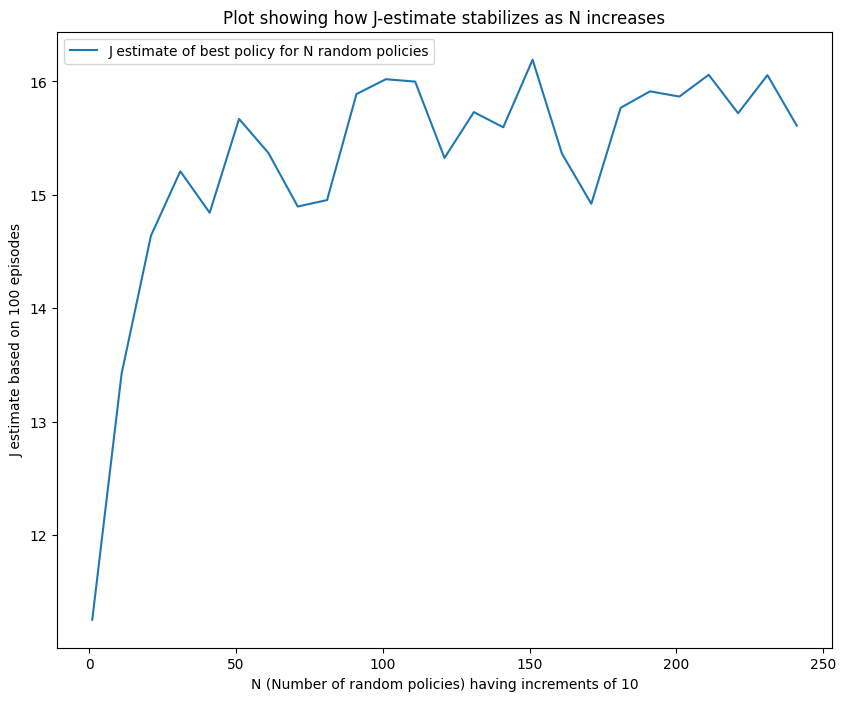

In [90]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 8)
sns.lineplot(df_3, x="N", y="J_estimate", label = "J estimate of best policy for N random policies")
# sns.lineplot(df_2, x="run_number", y=7.6527979999959035, label = "Final J estimate = 7.6528", linestyle="--")

# ax.set_xscale('log')

ax.set_xlabel("N (Number of random policies) having increments of 10")
ax.set_ylabel("J estimate based on 100 episodes")
ax.set_title("Plot showing how J-estimate stabilizes as N increases")
plt.show()